<a href="https://colab.research.google.com/github/ytlee3/MSE485_DeepLearning/blob/main/MSE485_DL_test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
import pandas as pd
import numpy as np
import h5py
import pickle
import tables
import matplotlib.pyplot as plt
import os 
import time
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
# from tensorflow.keras.layers.normalization import BatchNormalization
# from keras.optimizers import Adam
# from keras.optimizers import adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy import integrate
from sklearn.model_selection import train_test_split
from keras import backend as K 
import tensorflow
print(tensorflow.__version__)


2.7.0


In [ ]:
import numpy as np 
import time 
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline
def figure_adjust(x):
  for ax in plt.gcf().get_axes():
    ax.tick_params(labelsize=x,direction='in',length=8,width=3,pad=8)
    ax.spines["top"].set_linewidth(standard)
    ax.spines["bottom"].set_linewidth(standard)
    ax.spines["right"].set_linewidth(standard)
    ax.spines["left"].set_linewidth(standard)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Arial') for label in labels]
    [label.set_weight('bold') for label in labels]
standard = 2.5
font1 = {'family': 'Arial','weight': 'bold','size': 24}
font2 = {'family': 'Arial','weight': 'bold','size': 18}
font3 = {'family': 'Arial','weight': 'bold','size': 16}

In [ ]:
def make_data(rand, train_num): 
  X_train, Y_train = [], []
  for i in range(train_num, len(rand)):
    X_train.append(rand[i- train_num:i])
    Y_train.append(rand[i])
  return np.array(X_train), np.array(Y_train)
def split_data(all_x,all_y,split_ratio):
    leng = all_x.shape[0]
    num = all_x.shape[1]
    last_num = leng-int(split_ratio * leng)
    x_train = all_x[:all_x.shape[0]-last_num,:]
    y_train = all_y[:all_x.shape[0]-last_num]
    x_test  = all_x[all_x.shape[0]-last_num:,:]
    y_test  = all_y[all_x.shape[0]-last_num:]
    return x_train.reshape(-1, num, 1), y_train, x_test.reshape(-1,num,1), y_test 

In [ ]:
# upload the file first 
# use np.loadtxt to read ur random number sequence (1D dataset)

In [ ]:
mi_LCG = np.loadtxt('mi_LCG.txt')
Turbo_LCG = np.loadtxt('Turbo_LCG.txt')
Unix_LCG = np.loadtxt('Unix_LCG.txt')
Qrand = np.loadtxt('Qrand.txt')
LFG = np.loadtxt('LFG.txt')
PCG = np.loadtxt('PCG.txt')
MT = np.loadtxt('MT.txt')
MRG = np.loadtxt('MRG.txt')

In [ ]:
all_x, all_y = make_data(mi_LCG , 10) # put your RNG here
x_train, y_train, x_test, y_test = split_data(all_x, all_y, 0.9)
print(x_train.shape, y_train.shape)

(8991, 10, 1) (8991,)


In [ ]:
del regressor2 
K.clear_session()
learning_rate = 0.001
regressor2 = Sequential() 
regressor2.add(Dense(16, input_shape = (10,)))
regressor2.add(Dense(32, activation= 'relu'))
regressor2.add(Dense(64, activation= 'relu'))
regressor2.add(Dense(32, activation= 'relu'))
regressor2.add(Dense(16, activation= 'relu'))
regressor2.add(Dense(8, activation= 'relu'))
regressor2.add(Dense(1))
regressor2.compile(optimizer= Adam(learning_rate=learning_rate), 
                   loss='mse', metrics=['mae']  )
history = regressor2.fit(x_train, y_train,epochs = 100, 
                         batch_size = 16)

Epoch 1/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0981 - mae: 0.2653
Epoch 2/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0862 - mae: 0.2541
Epoch 3/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0858 - mae: 0.2536
Epoch 4/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0853 - mae: 0.2530
Epoch 5/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0852 - mae: 0.2533
Epoch 6/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0851 - mae: 0.2530
Epoch 7/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0850 - mae: 0.2526
Epoch 8/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0850 - mae: 0.2527
Epoch 9/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0848 - mae: 0.2525
Epoch 10/100
562/562 [==============================] - 1s 1ms/step - loss: 0.0848 - mae: 0.2526
Epoch 11/100
562/562 [=================

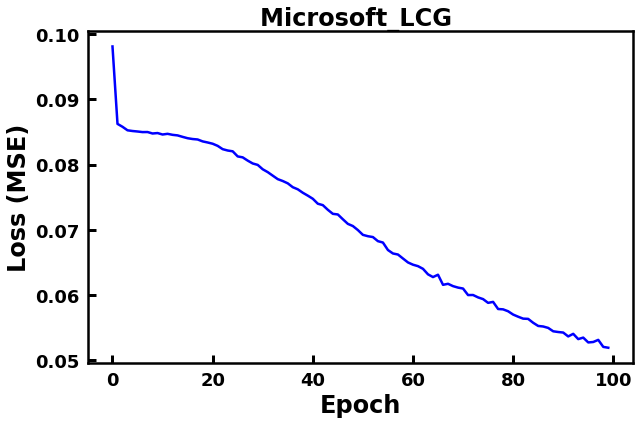

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Microsoft_LCG ', font1)
plt.ylabel('Loss (MSE)',font1)
plt.xlabel('Epoch',font1)
plt.plot(history.history['loss'],linewidth = standard,color='blue')
figure_adjust(18)
plt.tight_layout()

Correlation:  -5.280640451807879  %


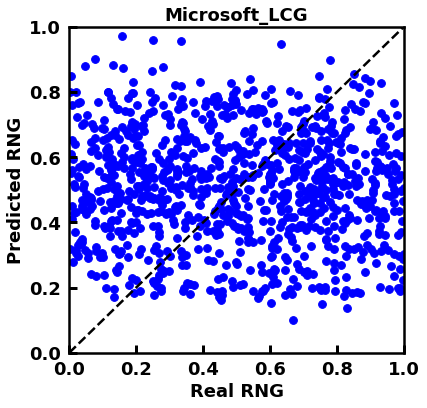

In [ ]:
y_predict= regressor2.predict(x_test)
plt.figure(figsize=(6,6))
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(y_test, y_predict, s=60, marker='o',color='blue')
plt.plot([0,1],[0,1],'--k',linewidth=standard)
plt.title('Microsoft_LCG',font2)
plt.xlabel('Real RNG',font2)
plt.ylabel('Predicted RNG',font2)
figure_adjust(18)
p2 = np.corrcoef(y_test.reshape(-1,1)[:,0],y_predict[:,0])[0]


# We only care about the Correlation
print('Correlation: ',p2[1]*100, ' %')

In [ ]:
print(p2)

[1.         0.95907606]


In [ ]:
y_predict= regressor2.predict(x_test)
p2 = np.corrcoef(y_test.reshape(-1,1)[:,0],y_predict[:,0])[0]
print('Correlation: ',p2[1]*100, ' %')

Correlation:  -5.280640451807879  %
